# Background and Context:

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.

Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.
 
# Data Description:

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").
 
# Dataset:

The dataset has the following columns:
•	tweet_id                                                           
•	airline_sentiment                                               
•	airline_sentiment_confidence                               
•	negativereason                                                   
•	negativereason_confidence                                    


# Importing the libraries

In [183]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [184]:
import warnings

warnings.filterwarnings("ignore")

! pip install nltk
import re
import numpy as np  # for large and multi-dimensional arrays
import pandas as pd  # for data manipulation and analysis
import nltk  # Natural language processing tool-kit


nltk.download("stopwords")  # download stopwords
nltk.download("wordnet")
nltk.download("punkt")
nltk.download("omw-1.4")

from nltk.corpus import stopwords  # Stopwords corpus
from nltk.stem import PorterStemmer  # Stemmer
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer  # For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer  # For TF-IDF

!pip install vaderSentiment    # Install vader sentiment package
!pip install textblob   # Install textblob package

# install and import necessary libraries.

!pip install contractions

import re, string, unicodedata  # Import Regex, string and unicodedata.
import contractions  # Import contractions library.
from bs4 import BeautifulSoup  # Import BeautifulSoup.

import numpy as np  # Import numpy.
import pandas as pd  # Import pandas.
import nltk  # Import Natural Language Tool-Kit.

from nltk.corpus import stopwords  # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer  # Import Lemmatizer.
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier  # Import Random forest Classifier
from sklearn.metrics import classification_report  # Import Classification report
from sklearn.model_selection import cross_val_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\URSMAR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\URSMAR\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\URSMAR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\URSMAR\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'


<IPython.core.display.Javascript object>

In [185]:
# Loading and exploring the data

path = "/Users/URSMAR/Desktop/"

data = pd.read_csv(path + "Tweets.csv")

<IPython.core.display.Javascript object>

In [186]:
# Let's view the first and last rows
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24/02/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24/02/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24/02/2015 11:14,NaN,Pacific Time (US & Canada)


<IPython.core.display.Javascript object>

In [187]:
data.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,5.695880e+17,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,22/02/2015 12:01,NaN,NaN
14636,5.695870e+17,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,22/02/2015 11:59,Texas,NaN
14637,5.695870e+17,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,22/02/2015 11:59,"Nigeria,lagos",NaN
14638,5.695870e+17,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,22/02/2015 11:59,New Jersey,Eastern Time (US & Canada)
14639,5.695870e+17,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,22/02/2015 11:58,"dallas, TX",NaN


<IPython.core.display.Javascript object>

# Exploratory Data Analysis (EDA)

In [188]:
data.shape  # print shape of data.

(14640, 15)

<IPython.core.display.Javascript object>

There are 14,640 observations and 15 variables

In [189]:
data.isnull().sum(axis=0)  # Check for NULL values.

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

<IPython.core.display.Javascript object>

There are null observations in the dataset. We'll leave this empty as imputing 'most frequent text' would not make sense e.g imputing another reason where the negativereason is not stated would be misleading. 

In [190]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  float64
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

<IPython.core.display.Javascript object>

There are 3 float variables, 1 int variable and 11 object variables.

tweet_created variable would be converted to date time data type to split the parts for further analysis.
object-type columns would be converted to categorical type. It reduces the data space required to store the dataframe.
This is very useful as the text and airline_sentiment are objects.

In [191]:
# Fixing the datatypes

data["tweet_created"] = pd.to_datetime(data.tweet_created)

<IPython.core.display.Javascript object>

In [192]:
# Converting object-type variables to 'category'
for feature in data.columns:  # Loop through all columns in the dataframe
    if (
        data[feature].dtype == "object"
    ):  # Only apply for columns with categorical strings
        data[feature] = pd.Categorical(data[feature])  # Replace strings with an integer
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:00,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:00,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:00,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:00,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:00,NaN,Pacific Time (US & Canada)


<IPython.core.display.Javascript object>

In [193]:
# Let's check for the dtypes after the conversion of object-type variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   tweet_id                      14640 non-null  float64       
 1   airline_sentiment             14640 non-null  category      
 2   airline_sentiment_confidence  14640 non-null  float64       
 3   negativereason                9178 non-null   category      
 4   negativereason_confidence     10522 non-null  float64       
 5   airline                       14640 non-null  category      
 6   airline_sentiment_gold        40 non-null     category      
 7   name                          14640 non-null  category      
 8   negativereason_gold           32 non-null     category      
 9   retweet_count                 14640 non-null  int64         
 10  text                          14640 non-null  category      
 11  tweet_coord                 

<IPython.core.display.Javascript object>

The object variables have been converted to category variables.

In [194]:
# Extracting date and time parts from tweet_created variable to create new columns

data["tweet_year"] = data.tweet_created.dt.year
data["tweet_month"] = data.tweet_created.dt.month
data["tweet_day"] = data.tweet_created.dt.day
data["tweet_hour"] = data.tweet_created.dt.hour
data["tweet_minute"] = data.tweet_created.dt.minute
data["tweet_second"] = data.tweet_created.dt.second

data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,...,tweet_coord,tweet_created,tweet_location,user_timezone,tweet_year,tweet_month,tweet_day,tweet_hour,tweet_minute,tweet_second
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,...,NaN,2015-02-24 11:35:00,NaN,Eastern Time (US & Canada),2015,2,24,11,35,0
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,...,NaN,2015-02-24 11:15:00,NaN,Pacific Time (US & Canada),2015,2,24,11,15,0
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,...,NaN,2015-02-24 11:15:00,Lets Play,Central Time (US & Canada),2015,2,24,11,15,0
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,...,NaN,2015-02-24 11:15:00,NaN,Pacific Time (US & Canada),2015,2,24,11,15,0
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,...,NaN,2015-02-24 11:14:00,NaN,Pacific Time (US & Canada),2015,2,24,11,14,0


<IPython.core.display.Javascript object>

In [195]:
# Let's drop the tweet_created variable since new variables have been created from this variable
data.drop("tweet_created", axis=1, inplace=True)
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_location,user_timezone,tweet_year,tweet_month,tweet_day,tweet_hour,tweet_minute,tweet_second
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,NaN,Eastern Time (US & Canada),2015,2,24,11,35,0
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,NaN,Pacific Time (US & Canada),2015,2,24,11,15,0
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,Lets Play,Central Time (US & Canada),2015,2,24,11,15,0
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,NaN,Pacific Time (US & Canada),2015,2,24,11,15,0
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,NaN,Pacific Time (US & Canada),2015,2,24,11,14,0


<IPython.core.display.Javascript object>

In [196]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

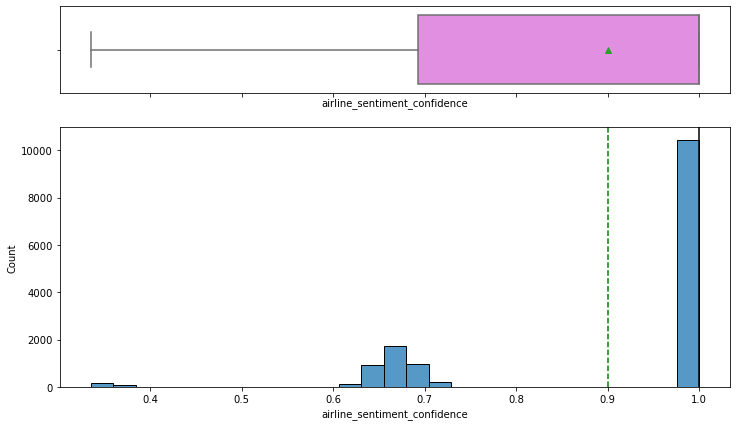

<IPython.core.display.Javascript object>

In [197]:
# a box plot of airline sentiment confidence for better visualization and analysis

histogram_boxplot(data, "airline_sentiment_confidence")

Here, a sentiment confidence of 0 is negative, while 1 represents a positive sentiment.

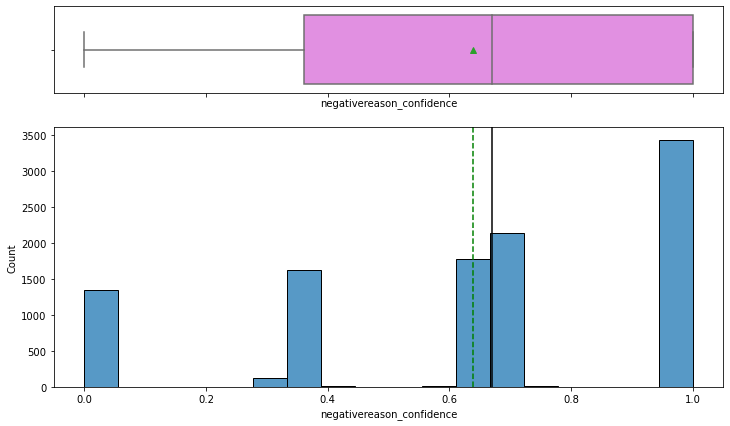

<IPython.core.display.Javascript object>

In [198]:
# a box plot of negartive reason confidence for better visualization and analysis

histogram_boxplot(data, "negativereason_confidence")

Here, a negativereason confidence of 0 is low, while 1 represents a high confidence.

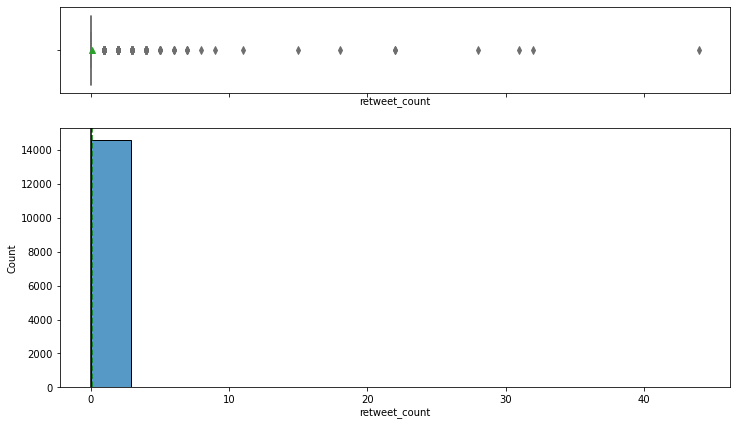

<IPython.core.display.Javascript object>

In [199]:
# a box plot of retweet count for better visualization and analysis

histogram_boxplot(data, "retweet_count")

Most of the tweets had zero retweets with the mean and median at zero. These are outliers in the datasets with numerous retweets.

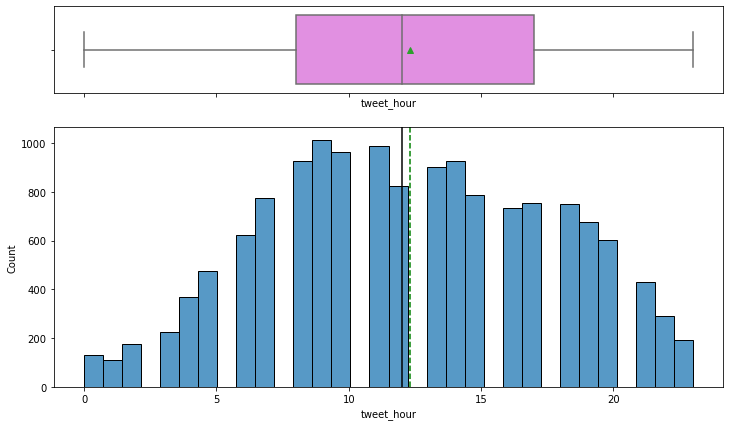

<IPython.core.display.Javascript object>

In [200]:
# a box plot of tweet_hour for better visualization and analysis

histogram_boxplot(data, "tweet_hour")

The mean and median tweet_hour is around the 12th hour

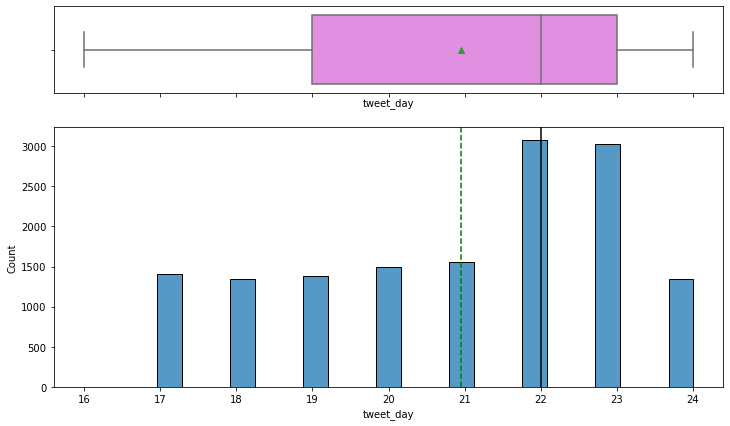

<IPython.core.display.Javascript object>

In [201]:
# a box plot of tweet_day for better visualization and analysis

histogram_boxplot(data, "tweet_day")

The mean tweet_day is the 21st day and the median twwet_day is 22nd.

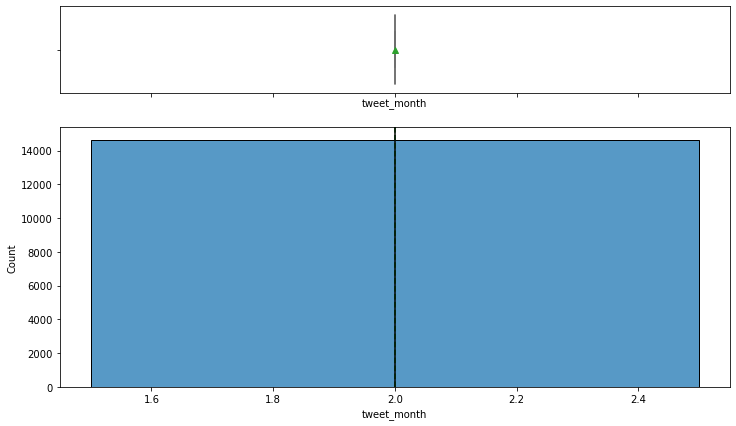

<IPython.core.display.Javascript object>

In [202]:
# a box plot of tweet_month for better visualization and analysis

histogram_boxplot(data, "tweet_month")

All tweets are in the 2nd month

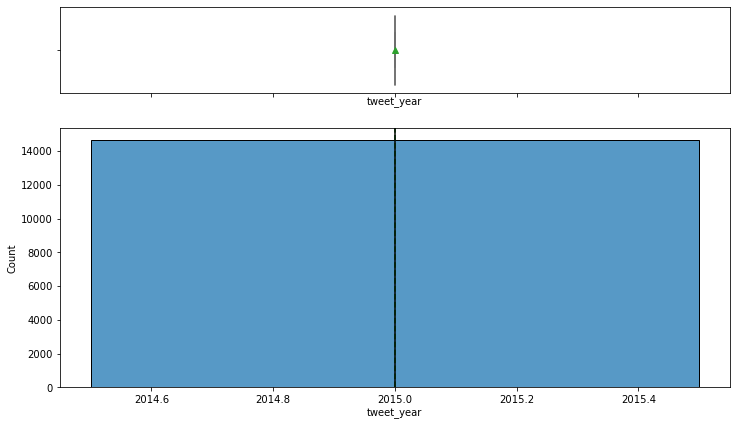

<IPython.core.display.Javascript object>

In [203]:
# a box plot of tweet_year for better visualization and analysis

histogram_boxplot(data, "tweet_year")

All tweets were in 2015

In [204]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

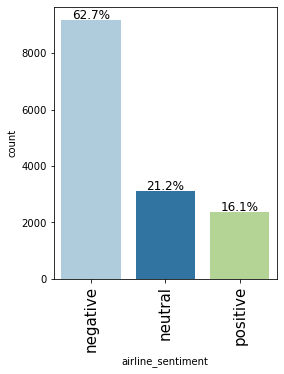

<IPython.core.display.Javascript object>

In [205]:
# a barplot of airline_sentiment for better visualization and analysis

labeled_barplot(data, "airline_sentiment")

62.7% of the airline_sentiment are negative while 21.2% and 16.1% are neutral or positive respectively. The fewest sentiments are in the positive class.

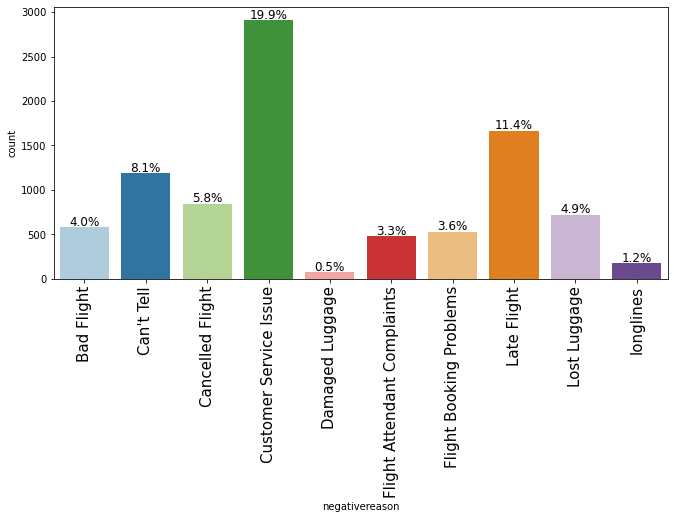

<IPython.core.display.Javascript object>

In [206]:
# a barplot of negative reason for better visualization and analysis

labeled_barplot(data, "negativereason")

The highest category of negative reason was for Customer Service Issue (19.9%) followed by Late Flight (11.4%). Damaged Luggage and longlines had the lowest % of negativereason (0.5% and 1.2% respectively).

All 'Others' may have been lumped under Customer Service Issue category.

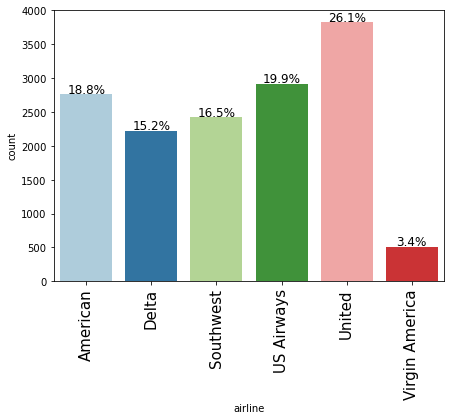

<IPython.core.display.Javascript object>

In [207]:
# a barplot of airline for better visualization and analysis

labeled_barplot(data, "airline")

Over a quarter of the observations flew United Airlines(26.1%) followed by American Airlines (18.8%). Virgin America has the lowest number of twwets in the dataset(3.4%)

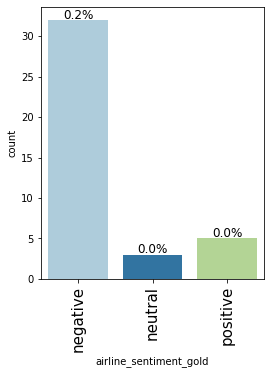

<IPython.core.display.Javascript object>

In [208]:
# a barplot of airline_sentiment_gold for better visualization and analysis

labeled_barplot(data, "airline_sentiment_gold")

Negative has the highest % in the airline_sentiment_gold and the % reflects the distribution in airline_sentiment

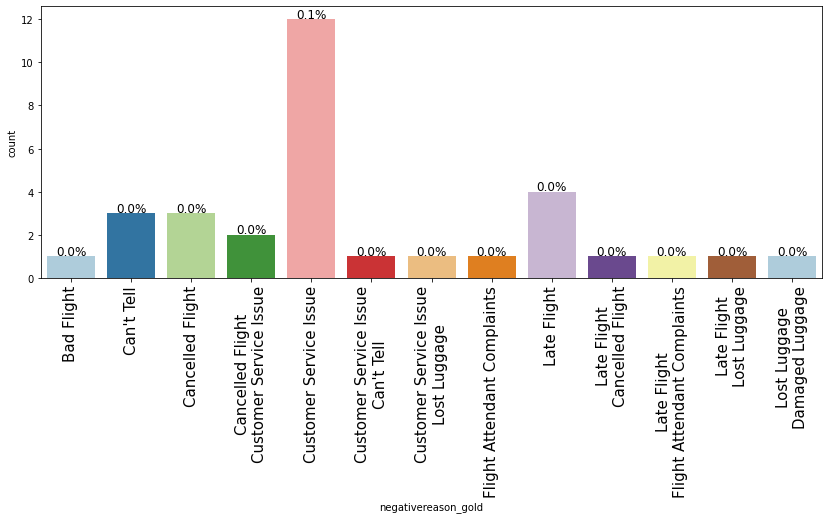

<IPython.core.display.Javascript object>

In [209]:
# a barplot of negativereason_gold for better visualization and analysis

labeled_barplot(data, "negativereason_gold")

Customer Service Issue has the highest % in the negativereason_gold and the % reflects the distribution in negativereason

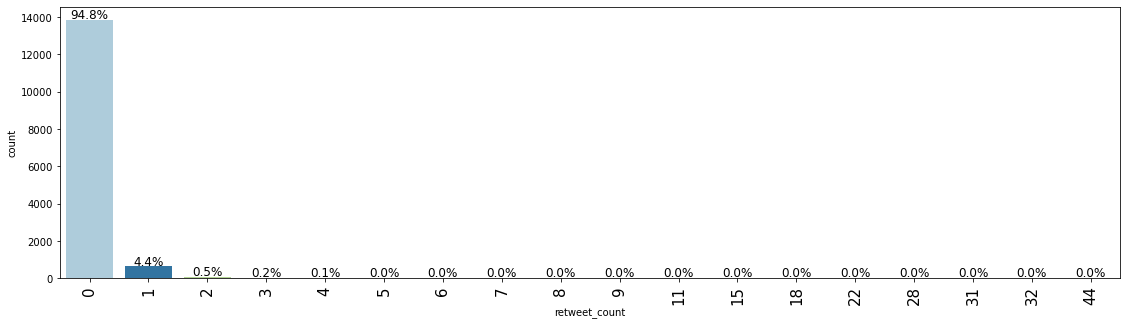

<IPython.core.display.Javascript object>

In [210]:
# a barplot of retweet_count for better visualization and analysis

labeled_barplot(data, "retweet_count")

Almost 95% of the tweets were not retweeted.

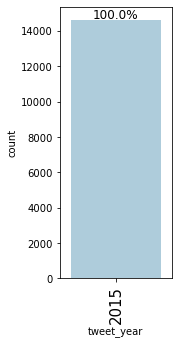

<IPython.core.display.Javascript object>

In [211]:
# a barplot of tweet_year for better visualization and analysis

labeled_barplot(data, "tweet_year")

The tweet_year for all of the tweets is 2015

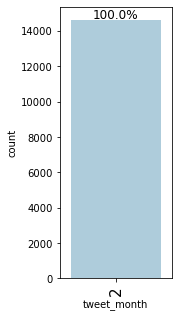

<IPython.core.display.Javascript object>

In [212]:
# a barplot of tweet_month for better visualization and analysis

labeled_barplot(data, "tweet_month")

The tweet_month for all of the tweets is February

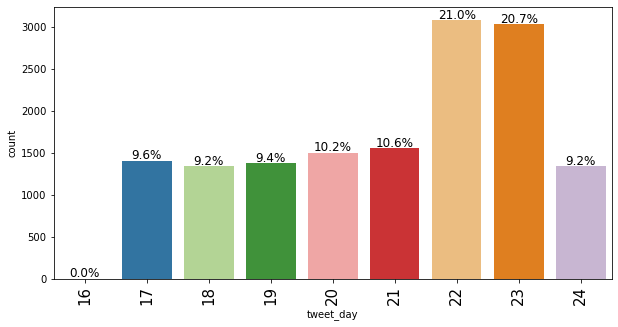

<IPython.core.display.Javascript object>

In [213]:
# a barplot of tweet_day for better visualization and analysis

labeled_barplot(data, "tweet_day")

The tweets in the datset were made within 8 days in February 2015 (17th to 24th)

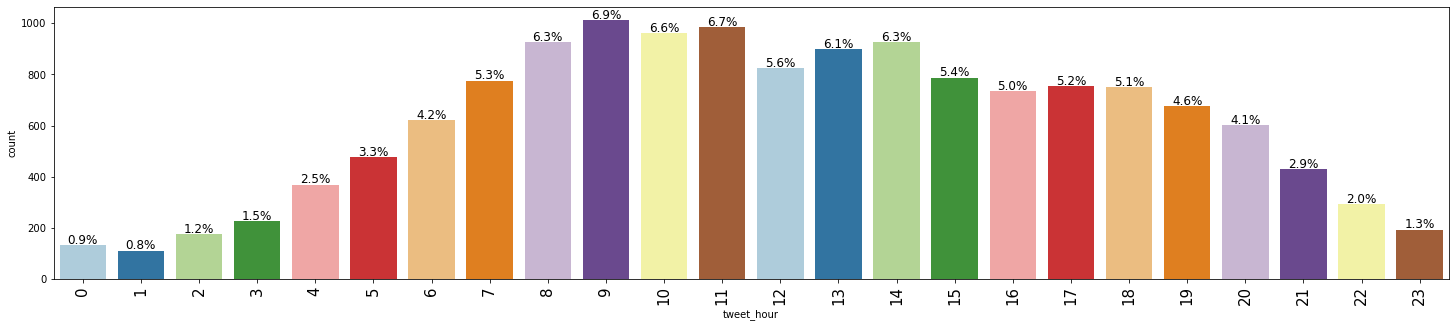

<IPython.core.display.Javascript object>

In [214]:
# a barplot of tweet_hour for better visualization and analysis

labeled_barplot(data, "tweet_hour")

The peak hours for the tweets were 5th hour to the 20th hour

# Bivariate analysis

These boxplots show any relationships between 2 variables

<AxesSubplot:xlabel='airline', ylabel='airline_sentiment_confidence'>

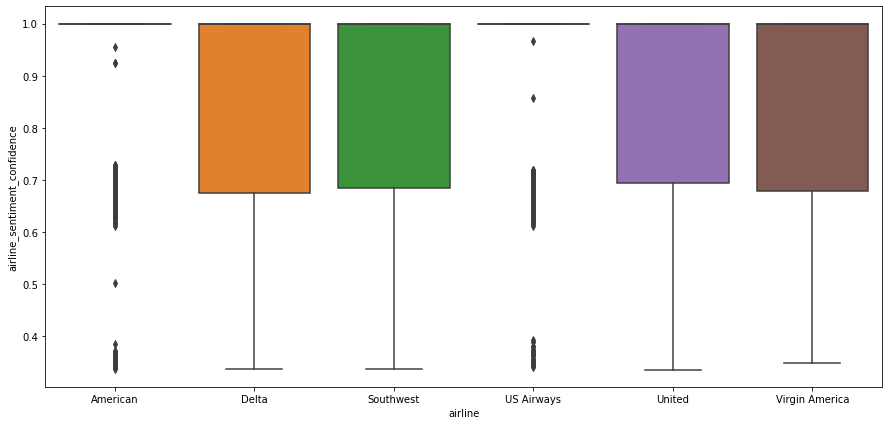

<IPython.core.display.Javascript object>

In [215]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="airline", y="airline_sentiment_confidence", data=data)

The airline_sentiment_confidence across all airlines appears to be at same level except for American Airlines and US Airways.

<AxesSubplot:xlabel='airline', ylabel='negativereason_confidence'>

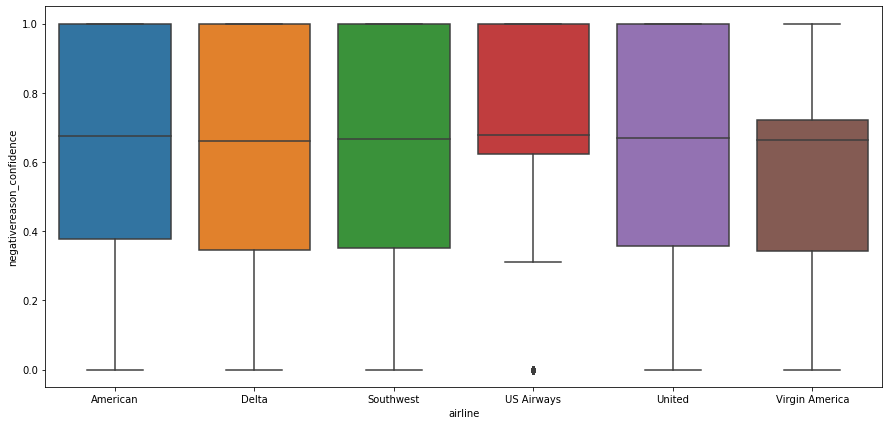

<IPython.core.display.Javascript object>

In [216]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="airline", y="negativereason_confidence", data=data)

The negativereason_confidence of the airlines are almost at same level except for US Airways and Virgin America
The median is 0.7 for all airlines.
US Airways has an outlier value with a zero negativereason_confidence

<AxesSubplot:xlabel='airline', ylabel='retweet_count'>

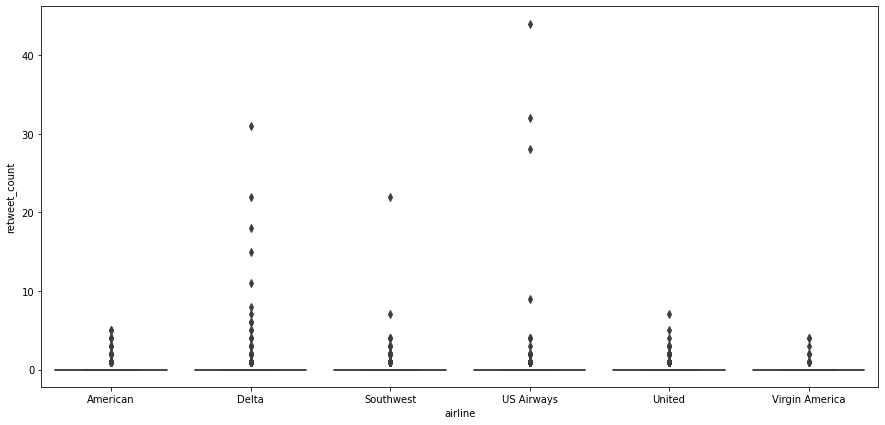

<IPython.core.display.Javascript object>

In [217]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="airline", y="retweet_count", data=data)

Most retweet counts are between 0 and 7. The most retweeted tweet (40+) was on US Airways.

<AxesSubplot:xlabel='airline', ylabel='tweet_day'>

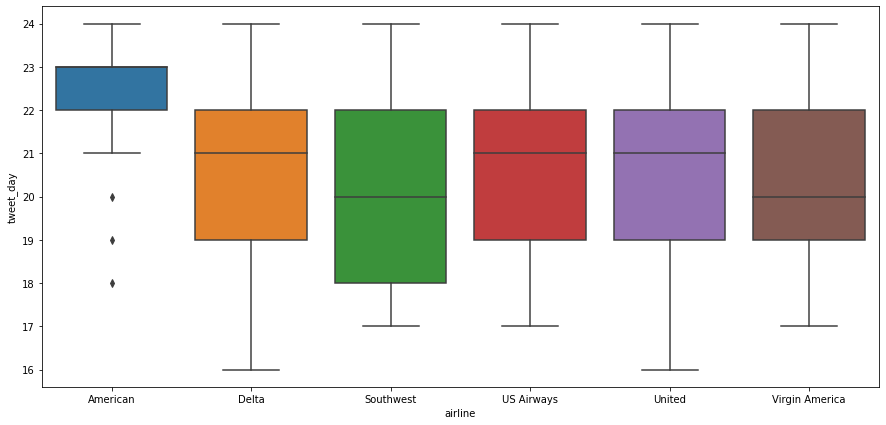

<IPython.core.display.Javascript object>

In [218]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="airline", y="tweet_day", data=data)

The median is around 21st day for the tweets with American and Southwest as the exception

<AxesSubplot:xlabel='airline', ylabel='tweet_hour'>

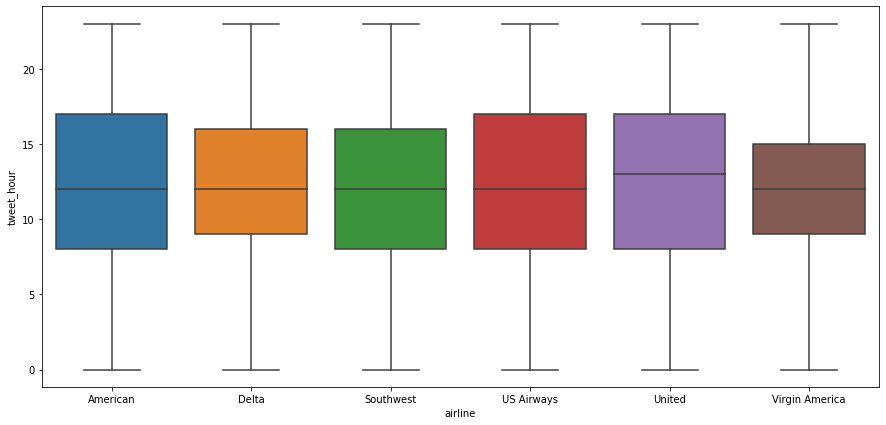

<IPython.core.display.Javascript object>

In [219]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="airline", y="tweet_hour", data=data)

The median hour of the tweet_hour is around the 12th hour for most tweets

In [220]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

airline_sentiment  negative  neutral  positive    All
airline                                              
All                    9178     3099      2363  14640
Southwest              1186      664       570   2420
Delta                   955      723       544   2222
United                 2633      697       492   3822
American               1960      463       336   2759
US Airways             2263      381       269   2913
Virgin America          181      171       152    504
------------------------------------------------------------------------------------------------------------------------


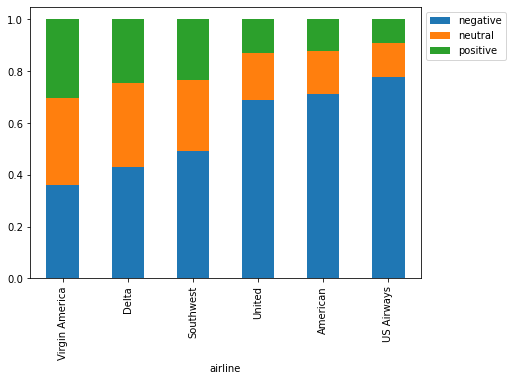

<IPython.core.display.Javascript object>

In [221]:
stacked_barplot(data, "airline", "airline_sentiment")

The majority of airline_sentiment was negative

United Airlines has 2,633 (28.6%) out of the 9,178 negative airline_sentiment followed by US Airways. Virgin America had the least.

About 50% of the positive airline_sentiment labels were Southwest and Delta.

negativereason  Bad Flight  Can't Tell  Cancelled Flight  \
airline                                                    
All                    580        1190               847   
United                 216         379               181   
Southwest               90         159               162   
American                87         198               246   
Delta                   64         186                51   
US Airways             104         246               189   
Virgin America          19          22                18   

negativereason  Customer Service Issue  Damaged Luggage  \
airline                                                   
All                               2910               74   
United                             681               22   
Southwest                          391               14   
American                           768               12   
Delta                              199               11   
US Airways                         811        

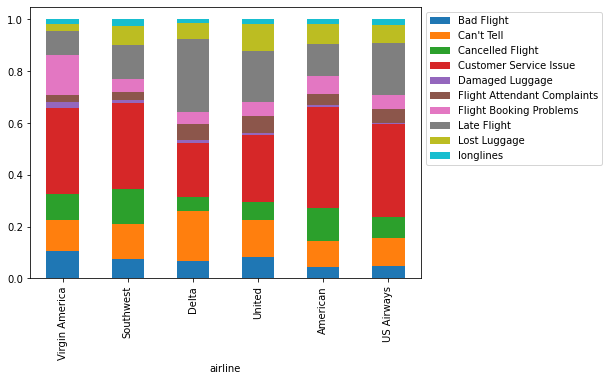

<IPython.core.display.Javascript object>

In [222]:
stacked_barplot(data, "airline", "negativereason")

Customer Service Issue is the majority of negativereason. It appears to be a bucket for "Others"

airline_sentiment_gold  negative  neutral  positive  All
airline                                                 
All                           32        3         5   40
Southwest                      5        2         1    8
United                         7        1         0    8
American                      11        0         3   14
Delta                          7        0         0    7
US Airways                     2        0         1    3
------------------------------------------------------------------------------------------------------------------------


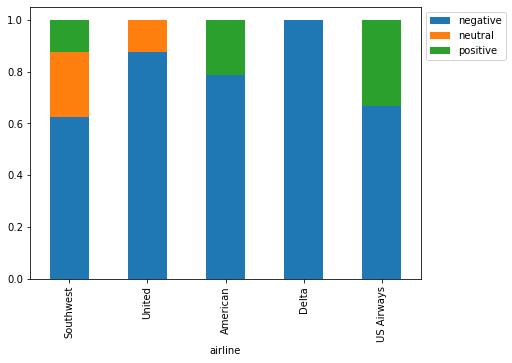

<IPython.core.display.Javascript object>

In [223]:
stacked_barplot(data, "airline", "airline_sentiment_gold")

American Airlines has over one-third of the negative airline_sentiment_gold

retweet_count       0    1   2   3   4  5  6  7  8  9  11  15  18  22  28  31  \
airline                                                                         
US Airways       2794  101  10   1   3  0  0  0  0  1   0   0   0   0   1   0   
All             13873  640  66  22  17  5  3  3  1  1   1   1   1   2   1   1   
American         2683   55  10   4   5  2  0  0  0  0   0   0   0   0   0   0   
Delta            2130   60  11   6   3  2  3  1  1  0   1   1   1   1   0   1   
Southwest        2334   62  15   4   3  0  0  1  0  0   0   0   0   1   0   0   
United           3443  353  17   6   1  1  0  1  0  0   0   0   0   0   0   0   
Virgin America    489    9   3   1   2  0  0  0  0  0   0   0   0   0   0   0   

retweet_count   32  44    All  
airline                        
US Airways       1   1   2913  
All              1   1  14640  
American         0   0   2759  
Delta            0   0   2222  
Southwest        0   0   2420  
United           0   0   3822  
Virgin America

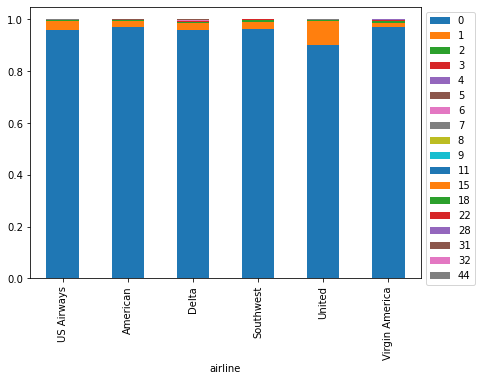

<IPython.core.display.Javascript object>

In [224]:
stacked_barplot(data, "airline", "retweet_count")

United Airlines have the highest count of retweets
US Airways has the highest count of retweet for a tweet(44 retweets).

tweet_day       16    17    18    19    20    21    22    23    24    All
airline                                                                  
All              4  1408  1344  1376  1500  1557  3079  3028  1344  14640
Delta            2   263   268   283   251   243   408   391   113   2222
United           2   396   406   426   526   506   703   641   216   3822
American         0     0     1     1     1     1   988  1141   626   2759
Southwest        0   384   292   317   319   370   279   276   183   2420
US Airways       0   311   317   279   333   360   648   488   177   2913
Virgin America   0    54    60    70    70    77    53    91    29    504
------------------------------------------------------------------------------------------------------------------------


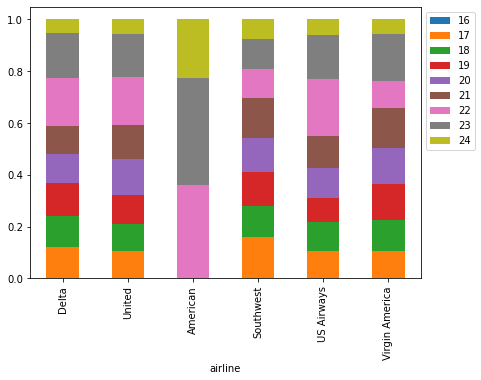

<IPython.core.display.Javascript object>

In [225]:
stacked_barplot(data, "airline", "tweet_day")

The tweets are evenly spread across the days for the airlines except American Airlines.
The bulk of American Airline tweets were in 3 days (22nd-24th February 2015)

tweet_hour        0    1    2    3    4    5    6    7    8     9  ...   15  \
airline                                                            ...        
All             131  111  174  225  368  477  621  776  926  1013  ...  788   
American         39   34   43   67   96   94  100  128  134   200  ...  146   
United           50   32   79   63   91  111  162  178  199   255  ...  234   
US Airways       20   20   22   51   75  116  138  160  211   195  ...  116   
Delta            10   12   16   22   59   70   87  138  135   119  ...  138   
Southwest         7    9   11   15   41   79  119  151  213   203  ...  127   
Virgin America    5    4    3    7    6    7   15   21   34    41  ...   27   

tweet_hour       16   17   18   19   20   21   22   23    All  
airline                                                        
All             734  754  751  675  602  430  292  193  14640  
American        138  162  152  119  107   88   65   50   2759  
United          198  173  208  2

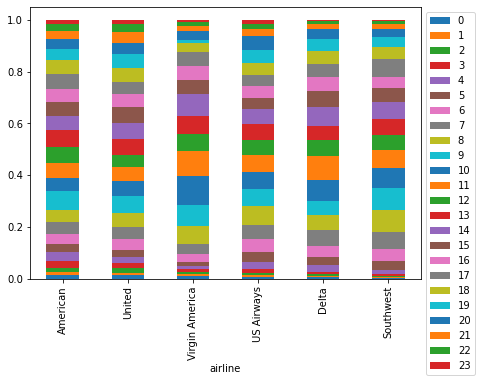

<IPython.core.display.Javascript object>

In [226]:
stacked_barplot(data, "airline", "tweet_hour")

The 6th - 20th hour were the hours with the most tweet activity

# Observations from Exploratory Data Analysis (EDA)


Most of the tweets had zero retweets with the mean and median at zero. These are outliers in the datasets with numerous retweets with a tweet having over 40 retweets

The mean and median tweet_hour is around the 12th hour

The mean tweet_day is the 21st day and the median twwet_day is 22nd.

62.7% of the airline_sentiment are negative while 21.2% and 16.1% are neutral or positive respectively. The fewest sentiments are in the positive class.

The highest category of negative reason was for Customer Service Issue (19.9%) followed by Late Flight (11.4%). Damaged Luggage and longlines had the lowest % of negativereason (0.5% and 1.2% respectively). All 'Others' may have been lumped under Customer Service Issue category.

Over a quarter of the observations flew United Airlines(26.1%) followed by American Airlines (18.8%). Virgin America has the lowest number of twwets in the dataset(3.4%)

Almost 95% of the tweets were not retweeted.

The tweets in the datset were made within 8 days in February 2015 (17th to 24th).

The peak hours for the tweets were 5th hour to the 20th hour

The majority of airline_sentiment was negative. United Airlines has 2,633 (28.6%) out of the 9,178 negative airline_sentiment followed by US Airways. Virgin America had the least. About 50% of the positive airline_sentiment labels were Southwest and Delta.

Most retweet counts are between 0 and 7. The most retweeted tweet (40+) was on US Airways.

The median is around 21st day for the tweets with American and Southwest as the exception.

# Word Cloud for Negative Reviews

In [227]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

<IPython.core.display.Javascript object>

In [228]:
# creating word cloud for negative reviews
negative_reviews = data[data["airline_sentiment"] == "negative"]
words = " ".join(negative_reviews["text"])
cleaned_word = " ".join([word for word in words.split()])

<IPython.core.display.Javascript object>

In [229]:
wordcloud = WordCloud(
    stopwords=STOPWORDS, background_color="black", width=3000, height=2500
).generate(cleaned_word)

<IPython.core.display.Javascript object>

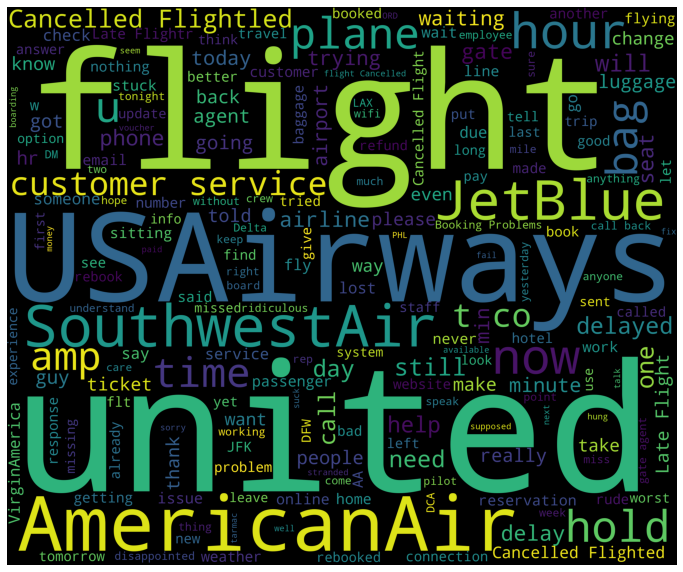

<IPython.core.display.Javascript object>

In [230]:
plt.figure(1, figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Cancelled, bag, customer service, luggage, united, US Airways, American Air, Southwest Air were some of the important recurring words observed in the negative reviews

# Word Cloud for Positive Reviews

In [231]:
# creating word cloud for positive reviews
positive_reviews = data[data["airline_sentiment"] == "positive"]
words = " ".join(positive_reviews["text"])
cleaned_word = " ".join([word for word in words.split()])

<IPython.core.display.Javascript object>

In [232]:
wordcloud = WordCloud(
    stopwords=STOPWORDS, background_color="black", width=3000, height=2500
).generate(cleaned_word)

<IPython.core.display.Javascript object>

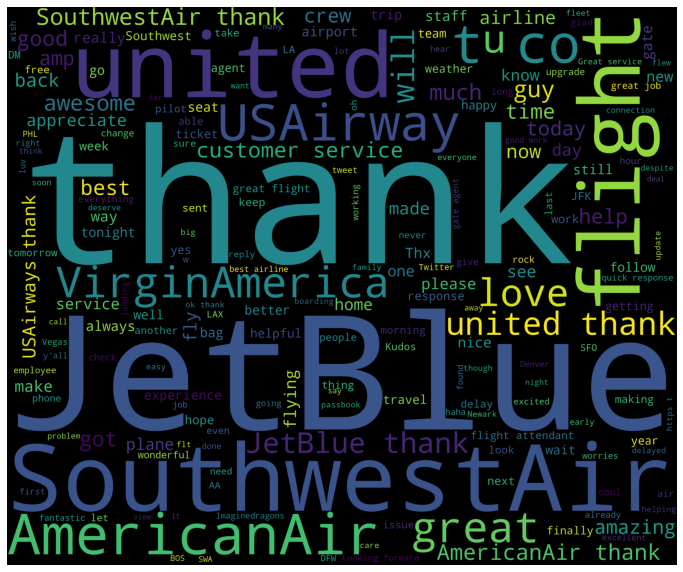

<IPython.core.display.Javascript object>

In [233]:
plt.figure(1, figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

thank, love, helpful, good, appreciate, help, amazing, staff, excellent, please, great service were some of the important words observed in the positive reviews

In [234]:
# Dropping all variables except airline_sentiment and text for further analysis
data.drop("tweet_id", axis=1, inplace=True)
data.drop("airline_sentiment_confidence", axis=1, inplace=True)
data.drop("negativereason", axis=1, inplace=True)
data.drop("negativereason_confidence", axis=1, inplace=True)
data.drop("airline", axis=1, inplace=True)
data.drop("airline_sentiment_gold", axis=1, inplace=True)
data.drop("name", axis=1, inplace=True)
data.drop("negativereason_gold", axis=1, inplace=True)
data.drop("retweet_count", axis=1, inplace=True)
data.drop("tweet_coord", axis=1, inplace=True)
data.drop("tweet_location", axis=1, inplace=True)
data.drop("user_timezone", axis=1, inplace=True)
data.drop("tweet_year", axis=1, inplace=True)
data.drop("tweet_month", axis=1, inplace=True)
data.drop("tweet_day", axis=1, inplace=True)
data.drop("tweet_hour", axis=1, inplace=True)
data.drop("tweet_minute", axis=1, inplace=True)
data.drop("tweet_second", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [235]:
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


<IPython.core.display.Javascript object>

All variables/columns except text and airline_sentiment dropped

In [236]:
data.shape

(14640, 2)

<IPython.core.display.Javascript object>

After dropping some columns, the new dataset contains 2 columns and 14,640 observations

In [237]:
data["airline_sentiment"].unique()  # check the labels

['neutral', 'positive', 'negative']
Categories (3, object): ['negative', 'neutral', 'positive']

<IPython.core.display.Javascript object>

There are 3 unique labels in the airline_sentiments column namely - negative, neutral, positive

In [238]:
data["airline_sentiment"].value_counts()  # check the count of each labels

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

<IPython.core.display.Javascript object>

The negative label is the dominant class in the dataset

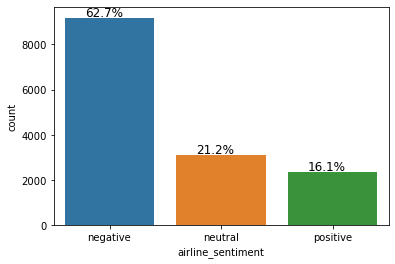

<IPython.core.display.Javascript object>

In [239]:
# plot the distribution of the class label
def bar_plot(data, feature):
    plot = sns.countplot(x=feature, data=data)
    total = len(data)
    for p in plot.patches:
        percentage = "{:.1f}%".format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(
            percentage,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )
    plt.show()


bar_plot(data, "airline_sentiment")

# Data Pre-processing

Carry out the following steps below:

Remove html tags.

Replace contractions in string. (e.g. replace I'm --> I am) and so on.

Remove numbers.

Tokenization.

Remove Stopwords.

Lemmatized data.

We'll use the NLTK library to tokenize words, remove stopwords and lemmatize the remaining words.

In [240]:
# remove the html tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()


# expand the contractions
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)


# remove the numericals present in the text
def remove_numbers(text):
    text = re.sub(r"\d+", "", text)
    return text


def clean_text(text):
    text = strip_html(text)
    text = replace_contractions(text)
    text = remove_numbers(text)
    return text


data["text"] = data["text"].apply(lambda x: clean_text(x))
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials...
2,neutral,@VirginAmerica I did not today... Must mean I ...
3,negative,@VirginAmerica it is really aggressive to blas...
4,negative,@VirginAmerica and it is a really big bad thin...


<IPython.core.display.Javascript object>

In [241]:
data["text"] = data.apply(
    lambda row: nltk.word_tokenize(row["text"]), axis=1
)  # Tokenization of data
data.head()

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, have, added, com..."
2,neutral,"[@, VirginAmerica, I, did, not, today, ..., Mu..."
3,negative,"[@, VirginAmerica, it, is, really, aggressive,..."
4,negative,"[@, VirginAmerica, and, it, is, a, really, big..."


<IPython.core.display.Javascript object>

In [242]:
# importing English stopwords
from nltk.corpus import stopwords

stopwords = stopwords.words("english")
stopwords = list(set(stopwords))
lemmatizer = WordNetLemmatizer()

# remove the non-ASCII characters
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = (
            unicodedata.normalize("NFKD", word)
            .encode("ascii", "ignore")
            .decode("utf-8", "ignore")
        )
        new_words.append(new_word)
    return new_words


# convert all characters to lowercase
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words


# Remove the punctuations
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r"[^\w\s]", "", word)
        if new_word != "":
            new_words.append(new_word)
    return new_words


# Remove the stop words
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words


# lemmatize the words
def lemmatize_list(words):
    new_words = []
    for word in words:
        new_words.append(lemmatizer.lemmatize(word, pos="v"))
    return new_words


def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return " ".join(words)


data["text"] = data.apply(lambda row: normalize(row["text"]), axis=1)

<IPython.core.display.Javascript object>

In [243]:
data.head()

,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus add commercials experience ...
2,neutral,virginamerica today must mean need take anothe...
3,negative,virginamerica really aggressive blast obnoxiou...
4,negative,virginamerica really big bad thing


<IPython.core.display.Javascript object>

# Supervised Learning for Sentiment Analysis

# Bag of Words (CountVectorizer)

In Bag of Words, we'll construct a dictionary that contains the set of all unique words from our text review dataset. 

The frequency of the word is counted here. If there are d unique words in our dictionary then for every review the vector will be of length d and count of word from reviews is stored at its particular location in vector. The vector will be highly sparse in such cases.

In [244]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

Count_vec = CountVectorizer(
    max_features=500
)  # Keep only 500 features as number of features will increase the processing time.
data_features = Count_vec.fit_transform(data["text"])

data_features = data_features.toarray()  # Convert the data features to array.

<IPython.core.display.Javascript object>

In [245]:
data_features.shape  # Shape of the feature vector

(14640, 500)

<IPython.core.display.Javascript object>

There are 14,640 columns and 500 observations in the feature vector

In [246]:
X = data_features

y = data.airline_sentiment

<IPython.core.display.Javascript object>

In [247]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

<IPython.core.display.Javascript object>

In [248]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = np.arange(100, 400, 100).tolist()
base_ln

[100, 200, 300]

<IPython.core.display.Javascript object>

In [249]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators=b)
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy")
    cv_scores.append(scores.mean())

<IPython.core.display.Javascript object>

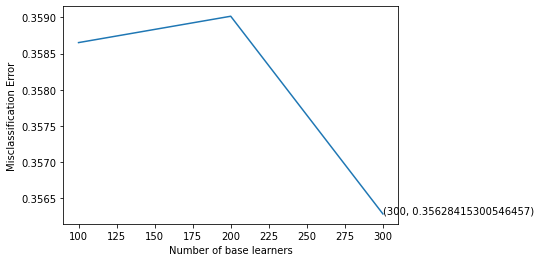

<IPython.core.display.Javascript object>

In [250]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]  # error corresponds to each nu of estimator
optimal_learners = base_ln[
    error.index(min(error))
]  # Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(
    base_ln, error
)  # Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate("(%s, %s)" % xy, xy=xy, textcoords="data")
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [251]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators=optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
count_vectorizer_predicted = clf.predict(X_test)
print(
    classification_report(
        y_test,
        count_vectorizer_predicted,
        target_names=["neutral", "positive", "negative"],
    )
)
print("Accuracy of the model is : ", accuracy_score(y_test, count_vectorizer_predicted))

              precision    recall  f1-score   support

     neutral       0.86      0.88      0.87      2627
    positive       0.47      0.44      0.45       577
    negative       0.66      0.62      0.64       456

    accuracy                           0.78      3660
   macro avg       0.66      0.64      0.65      3660
weighted avg       0.77      0.78      0.77      3660

Accuracy of the model is :  0.7751366120218579


<IPython.core.display.Javascript object>

The accuracy of the CountVectorizer model is 77.5%

[[2302  225  100]
 [ 277  251   49]
 [ 112   60  284]]


<AxesSubplot:>

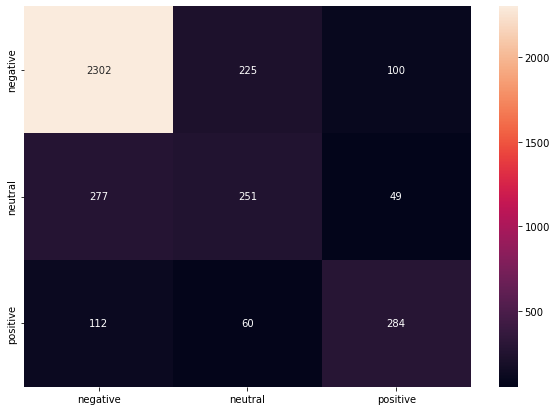

<IPython.core.display.Javascript object>

In [252]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, count_vectorizer_predicted)

print(conf_mat)

df_cm = pd.DataFrame(
    conf_mat,
    index=[i for i in ["negative", "neutral", "positive"]],
    columns=[i for i in ["negative", "neutral", "positive"]],
)
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt="g")

thank,usairways,unite,delay,great,flight,http,jetblue,love,get,southwestair,hold,hours,bag,awesome,cancel,fly,go,would,hour,virginamerica,please,time,amaze,make,wait,help,best,need,service,good,customer,plane,airline,say,us,call,like,still,know,
 
 


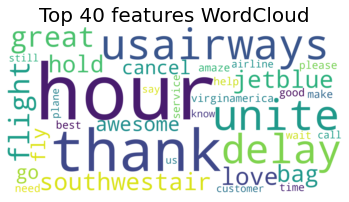

<IPython.core.display.Javascript object>

In [253]:
all_features = (
    Count_vec.get_feature_names_out()
)  # Instantiate the feature from the vectorizer
top_features = (
    ""  # Addition of top 40 feature into top_feature after training the model
)
feat = clf.feature_importances_
features = np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features += all_features[i]
    top_features += ","

print(top_features)

print(" ")
print(" ")

from wordcloud import WordCloud

wordcloud = WordCloud(
    background_color="white", colormap="viridis", width=2000, height=1000
).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation="bilinear")
plt.figure(1, figsize=(14, 11), frameon="equal")
plt.title("Top 40 features WordCloud", fontsize=20)
plt.axis("off")
plt.show()

# TF-IDF

Term Frequency - Inverse Document Frequency: 

It makes sure that less importance is given to the most frequent words, and it also considers less frequent words.

In [254]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_features=500)
data_features = tfidf_vect.fit_transform(data["text"])

data_features = data_features.toarray()

data_features.shape  # feature shape

(14640, 500)

<IPython.core.display.Javascript object>

In [255]:
X = data_features

y = data.airline_sentiment

<IPython.core.display.Javascript object>

In [256]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

<IPython.core.display.Javascript object>

In [257]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = np.arange(100, 400, 100).tolist()
base_ln

[100, 200, 300]

<IPython.core.display.Javascript object>

In [258]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators=b)
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy")
    cv_scores.append(scores.mean())

<IPython.core.display.Javascript object>

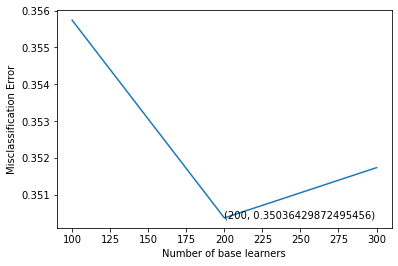

<IPython.core.display.Javascript object>

In [259]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]  # error corresponds to each nu of estimator
optimal_learners = base_ln[
    error.index(min(error))
]  # Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(
    base_ln, error
)  # Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate("(%s, %s)" % xy, xy=xy, textcoords="data")
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [260]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators=optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
tf_idf_predicted = clf.predict(X_test)
print(
    classification_report(
        y_test, tf_idf_predicted, target_names=["neutral", "positive", "negative"]
    )
)
print("Accuracy of the model is : ", accuracy_score(y_test, tf_idf_predicted))

              precision    recall  f1-score   support

     neutral       0.81      0.95      0.87      2627
    positive       0.56      0.21      0.30       577
    negative       0.68      0.58      0.62       456

    accuracy                           0.78      3660
   macro avg       0.68      0.58      0.60      3660
weighted avg       0.76      0.78      0.75      3660

Accuracy of the model is :  0.7827868852459017


<IPython.core.display.Javascript object>

The TF-IDF model accuracy is 77.8% which is almost the same as the Count Vectorizer model (77.5%)

[[2483   67   77]
 [ 412  119   46]
 [ 167   26  263]]


<AxesSubplot:>

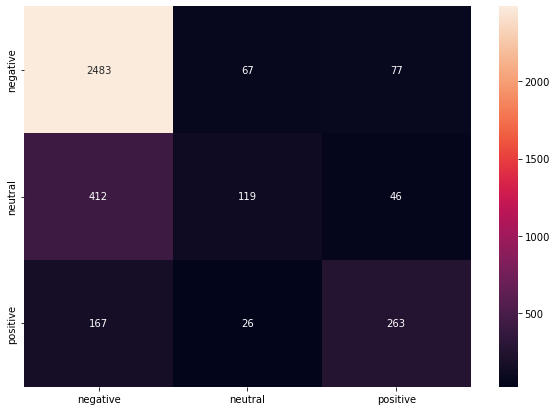

<IPython.core.display.Javascript object>

In [261]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, tf_idf_predicted)

print(conf_mat)

df_cm = pd.DataFrame(
    conf_mat,
    index=[i for i in ["negative", "neutral", "positive"]],
    columns=[i for i in ["negative", "neutral", "positive"]],
)
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt="g")

thank, jetblue, southwestair, unite, http, usairways, great, flight, delay, virginamerica, love, get, awesome, fly, amaze, please, hours, cancel, bag, hold, best, dm, wait, make, need, good, would, help, time, service, follow, go, hour, customer, us, tomorrow, airline, know, like, plane, 
 
 


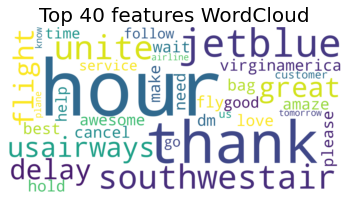

<IPython.core.display.Javascript object>

In [262]:
all_features = (
    tfidf_vect.get_feature_names_out()
)  # Instantiate the feature from the vectorizer
top_features = (
    ""  # Addition of top 40 feature into top_feature after training the model
)
feat = clf.feature_importances_
features = np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features += all_features[i]
    top_features += ", "

print(top_features)

print(" ")
print(" ")

from wordcloud import WordCloud

wordcloud = WordCloud(
    background_color="white", colormap="viridis", width=2000, height=1000
).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation="bilinear")
plt.figure(1, figsize=(14, 11), frameon="equal")
plt.title("Top 40 features WordCloud", fontsize=20)
plt.axis("off")
plt.show()

# Comparing the accuracies of Supervised Learning methods i.e Count Vectorizer and TF-IDF

In [263]:
# convert the test samples into a dataframe where the columns are
# the y_test(ground truth labels),tf-idf model predicted labels(tf_idf_predicted),Count Vectorizer model predicted labels(count_vectorizer_predicted)
df = pd.DataFrame(y_test.tolist(), columns=["y_test"])
df["count_vectorizer_predicted"] = count_vectorizer_predicted
df["tf_idf_predicted"] = tf_idf_predicted
df.head()

,y_test,count_vectorizer_predicted,tf_idf_predicted
0,negative,negative,negative
1,negative,negative,negative
2,negative,negative,negative
3,negative,negative,negative
4,positive,negative,negative


<IPython.core.display.Javascript object>

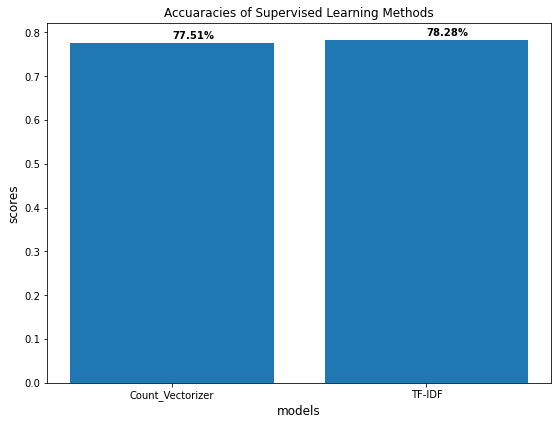

<IPython.core.display.Javascript object>

In [264]:
# create bar plot to compare the accuracies of Count Vectorizer and TF-IDF
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7, 5))
ax = fig.add_axes([0, 0, 1, 1])
subjects = ["Count_Vectorizer", "TF-IDF"]

# calculation accuracies of Count Vectorizer and TF-IDF using accuracy_score metrics
scores = [
    accuracy_score(y_test, count_vectorizer_predicted),
    accuracy_score(y_test, tf_idf_predicted),
]
ax.bar(subjects, scores)
ax.set_ylabel("scores", fontsize=12)  # y axis label
ax.set_xlabel("models", fontsize=12)  # x axis label
ax.set_title("Accuaracies of Supervised Learning Methods")  # tittle
for i, v in enumerate(scores):
    ax.text(i, v + 0.01, "{:.2f}%".format(100 * v), color="black", fontweight="bold")
    plt.savefig("barplot_1.png", dpi=100, format="png", bbox_inches="tight")
plt.show()

TF-IDF shows the same performance as the Count Vectorizer even though it focuses on the frequency of words present in the corpus and also provides the importance of the words. We can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions.

# Unsupervised Learning methods for Sentiment Analysis

# VADER

VADER (Valence Aware Dictionary and Sentiment Reasoner) is a lexicon and rule-based sentiment analysis tool that not only tells us about the Positivity and Negativity score, but also tells us how positive or negative a sentiment is.

In [265]:
import nltk

# download vader lexicon
nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\URSMAR\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<IPython.core.display.Javascript object>

In [266]:
data_new = (
    data.copy()
)  # make a copy of dataframe and do unsupervised operations on that dataframe

<IPython.core.display.Javascript object>

In [267]:
# Calculate the polarity score of the reviews
data_new["scores"] = data_new["text"].apply(
    lambda review: sentiment.polarity_scores(review)
)

data_new.head()

,airline_sentiment,text,scores
0,neutral,virginamerica dhepburn say,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,positive,virginamerica plus add commercials experience ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,neutral,virginamerica today must mean need take anothe...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,negative,virginamerica really aggressive blast obnoxiou...,"{'neg': 0.345, 'neu': 0.468, 'pos': 0.187, 'co..."
4,negative,virginamerica really big bad thing,"{'neg': 0.486, 'neu': 0.514, 'pos': 0.0, 'comp..."


<IPython.core.display.Javascript object>

In [268]:
# Calculate the compound score of the reviews
data_new["compound"] = data_new["scores"].apply(
    lambda score_dict: score_dict["compound"]
)

data_new.head()

,airline_sentiment,text,scores,compound
0,neutral,virginamerica dhepburn say,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,positive,virginamerica plus add commercials experience ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,neutral,virginamerica today must mean need take anothe...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,negative,virginamerica really aggressive blast obnoxiou...,"{'neg': 0.345, 'neu': 0.468, 'pos': 0.187, 'co...",-0.3306
4,negative,virginamerica really big bad thing,"{'neg': 0.486, 'neu': 0.514, 'pos': 0.0, 'comp...",-0.5829


<IPython.core.display.Javascript object>

In [269]:
# Classify the class of the review by keeping threshold on the compund score
data_new["comp_score"] = data_new["compound"].apply(lambda c: "1" if c >= 0 else "0")

data_new.head()

,airline_sentiment,text,scores,compound,comp_score
0,neutral,virginamerica dhepburn say,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
1,positive,virginamerica plus add commercials experience ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
2,neutral,virginamerica today must mean need take anothe...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
3,negative,virginamerica really aggressive blast obnoxiou...,"{'neg': 0.345, 'neu': 0.468, 'pos': 0.187, 'co...",-0.3306,0
4,negative,virginamerica really big bad thing,"{'neg': 0.486, 'neu': 0.514, 'pos': 0.0, 'comp...",-0.5829,0


<IPython.core.display.Javascript object>

In [270]:
data["VADER_pred"] = data_new["comp_score"].tolist()
data.head()

,airline_sentiment,text,VADER_pred
0,neutral,virginamerica dhepburn say,1
1,positive,virginamerica plus add commercials experience ...,1
2,neutral,virginamerica today must mean need take anothe...,1
3,negative,virginamerica really aggressive blast obnoxiou...,0
4,negative,virginamerica really big bad thing,0


<IPython.core.display.Javascript object>

In [271]:
# Replacing blanks with 'NaN' in preparation for missing value treatment

data["airline_sentiment"].replace("negative", "0", inplace=True)
data["airline_sentiment"].replace("neutral", "1", inplace=True)
data["airline_sentiment"].replace("positive", "2", inplace=True)

<IPython.core.display.Javascript object>

In [272]:
# Calculate the accuracy of the Vader Sentiment Analysis
data["airline_sentiment"] = data["airline_sentiment"].astype(
    int
)  # convert the sentiment column values into int data type
data["VADER_pred"] = data["VADER_pred"].astype(
    int
)  # convert the vader_predicted column values into int data type
print(
    "Accuaracy using Vader Sentiment Analysis is : ",
    accuracy_score(data["airline_sentiment"].tolist(), data["VADER_pred"].tolist()),
)

Accuaracy using Vader Sentiment Analysis is :  0.46297814207650273


<IPython.core.display.Javascript object>

The Accuracy of VADER Sentiment Analysis is 46.29%

[[4087 5091    0]
 [ 408 2691    0]
 [  88 2275    0]]


<AxesSubplot:>

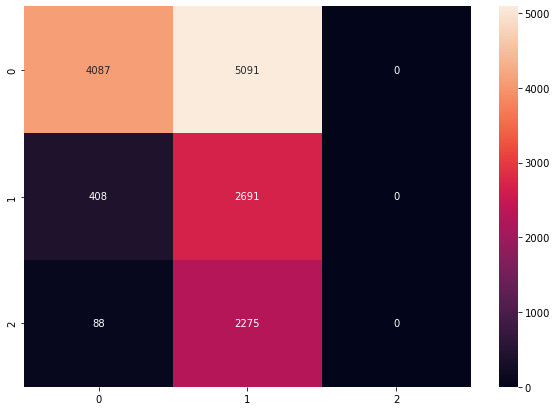

<IPython.core.display.Javascript object>

In [273]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(
    data["airline_sentiment"].tolist(), data["VADER_pred"].tolist()
)

print(conf_mat)

df_cm = pd.DataFrame(
    conf_mat, index=[i for i in ["0", "1", "2"]], columns=[i for i in ["0", "1", "2"]],
)
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt="g")

With the help of the TextBlob.sentiment() method, we can get the sentiments of the sentences by using TextBlob.sentiment() method.

# TextBlob

In [274]:
!pip install textblob
from textblob import TextBlob

<IPython.core.display.Javascript object>

In [275]:
data_new = (
    data.copy()
)  # make a copy of dataframe and do unsupervised operations on that dataframe

<IPython.core.display.Javascript object>

In [276]:
# Calculate the polarity score of the reviews
data_new["polarity"] = data_new["text"].apply(
    lambda review: TextBlob(review).sentiment.polarity
)

data_new.head()

,airline_sentiment,text,VADER_pred,polarity
0,1,virginamerica dhepburn say,1,0.00000
1,2,virginamerica plus add commercials experience ...,1,0.00000
2,1,virginamerica today must mean need take anothe...,1,-0.31250
3,0,virginamerica really aggressive blast obnoxiou...,0,0.00625
4,0,virginamerica really big bad thing,0,-0.35000


<IPython.core.display.Javascript object>

In [277]:
# Classify the class of the review by keeping threshold on the polarity score
data_new["polarity_score"] = data_new["polarity"].apply(
    lambda c: "1" if c >= 0 else "0"
)

data_new.head()

,airline_sentiment,text,VADER_pred,polarity,polarity_score
0,1,virginamerica dhepburn say,1,0.00000,1
1,2,virginamerica plus add commercials experience ...,1,0.00000,1
2,1,virginamerica today must mean need take anothe...,1,-0.31250,0
3,0,virginamerica really aggressive blast obnoxiou...,0,0.00625,1
4,0,virginamerica really big bad thing,0,-0.35000,0


<IPython.core.display.Javascript object>

In [278]:
data["Text_Blob_pred"] = data_new["polarity_score"].tolist()
data.head()

,airline_sentiment,text,VADER_pred,Text_Blob_pred
0,1,virginamerica dhepburn say,1,1
1,2,virginamerica plus add commercials experience ...,1,1
2,1,virginamerica today must mean need take anothe...,1,0
3,0,virginamerica really aggressive blast obnoxiou...,0,1
4,0,virginamerica really big bad thing,0,0


<IPython.core.display.Javascript object>

In [279]:
# Calculate the accuracy of the Vader Sentiment Analysis
data["airline_sentiment"] = data["airline_sentiment"].astype(
    int
)  # convert the sentiment column values into int data type
data["Text_Blob_pred"] = data["Text_Blob_pred"].astype(
    int
)  # convert the textblob predicted column values into int data type
print(
    "Accuaracy of using Text Blob Sentiment Analysis is : ",
    accuracy_score(data["airline_sentiment"].tolist(), data["Text_Blob_pred"].tolist()),
)

Accuaracy of using Text Blob Sentiment Analysis is :  0.3754781420765027


<IPython.core.display.Javascript object>

Accuracy of using Text Blob Sentiment Analysis is :  37.5%

[[2654 6524    0]
 [ 256 2843    0]
 [ 102 2261    0]]


<AxesSubplot:>

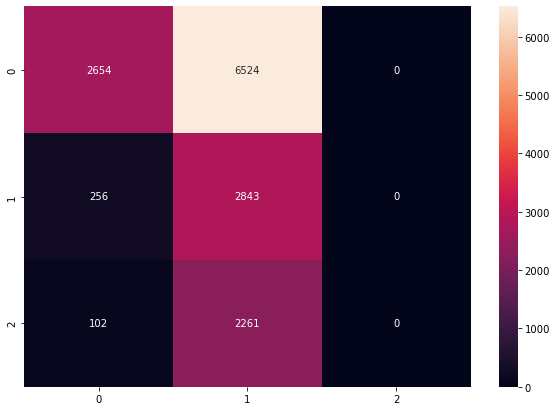

<IPython.core.display.Javascript object>

In [280]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(
    data["airline_sentiment"].tolist(), data["Text_Blob_pred"].tolist()
)

print(conf_mat)

df_cm = pd.DataFrame(
    conf_mat, index=[i for i in ["0", "1", "2"]], columns=[i for i in ["0", "1", "2"]]
)
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt="g")

# Comparing the accuracies of Unsupervised Learning methods VADER and TextBlob

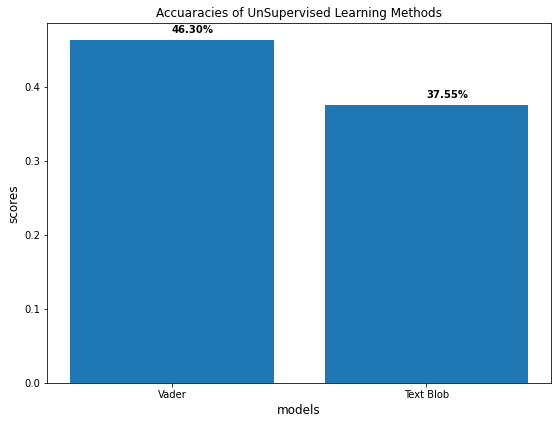

<IPython.core.display.Javascript object>

In [281]:
# plot the accuracies of the text blob and Vader
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7, 5))
ax = fig.add_axes([0, 0, 1, 1])
subjects = ["Vader", "Text Blob"]
# calculation accuracies of Vader and Textblob models using accuracy_score metrics
scores = [
    accuracy_score(data["airline_sentiment"].tolist(), data["VADER_pred"].tolist()),
    accuracy_score(data["airline_sentiment"].tolist(), data["Text_Blob_pred"].tolist()),
]
ax.bar(subjects, scores)
ax.set_ylabel("scores", fontsize=12)  # y-axis labels
ax.set_xlabel("models", fontsize=12)  # x-axis labels
ax.set_title("Accuaracies of UnSupervised Learning Methods")  # tittle of the graph
for i, v in enumerate(scores):
    ax.text(i, v + 0.01, "{:.2f}%".format(100 * v), color="black", fontweight="bold")
    plt.savefig("barplot_1.png", dpi=100, format="png", bbox_inches="tight")
plt.show()

Accuracy of using Text Blob Sentiment Analysis is 37.5% while the Accuracy of VADER Sentiment Analysis is 46.30%.
Here, VADER works better than TextBlob because VADER generally works better with things like slang, emojis, etc — whereas TextBlob performs strongly with more formal language usage.

# Conclusions


# The below are the takeaway points from the analysis:


# Exploratory Data Analysis.

Most of the tweets had zero retweets with the mean and median at zero. These are outliers in the datasets with numerous retweets with a tweet having over 40 retweets

The mean and median tweet_hour is around the 12th hour

The mean tweet_day is the 21st day and the median twwet_day is 22nd.

62.7% of the airline_sentiment are negative while 21.2% and 16.1% are neutral or positive respectively. The fewest sentiments are in the positive class.

The highest category of negative reason was for Customer Service Issue (19.9%) followed by Late Flight (11.4%). Damaged Luggage and longlines had the lowest % of negativereason (0.5% and 1.2% respectively). All 'Others' may have been lumped under Customer Service Issue category.

Over a quarter of the observations flew United Airlines(26.1%) followed by American Airlines (18.8%). Virgin America has the lowest number of twwets in the dataset(3.4%)

Almost 95% of the tweets were not retweeted.

The tweets in the datset were made within 8 days in February 2015 (17th to 24th).

The peak hours for the tweets were 5th hour to the 20th hour

The majority of airline_sentiment was negative. United Airlines has 2,633 (28.6%) out of the 9,178 negative airline_sentiment followed by US Airways. Virgin America had the least. About 50% of the positive airline_sentiment labels were Southwest and Delta.

Most retweet counts are between 0 and 7. The most retweeted tweet (40+) was on US Airways.

The median is around 21st day for the tweets with American and Southwest as the exception.


# Keyword identification

Cancelled, bag, customer service, luggage, united, US Airways, American Air, Southwest Air were some of the important recurring words observed in the negative reviews

thank, love, helpful, good, appreciate, help, amazing, staff, excellent, please, great service were some of the important words observed in the positive reviews.



# Text preprocessing methods.

After dropping all columns except airline_sentiment and text, the dataset to be analyzed contained 2 columns and 14,640 observations.

# Observations on Model Performance


The accuracy of the CountVectorizer model is 77.5%.

The TF-IDF model accuracy is 77.8% which is almost the same as the Count Vectorizer model (77.5%).

TF-IDF shows the same performance as the Count Vectorizer even though it focuses on the frequency of words present in the corpus and also provides the importance of the words. We can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions.

Accuracy of using Text Blob Sentiment Analysis is 37.5% while the Accuracy of VADER Sentiment Analysis is 46.30%.
Here, VADER works better than TextBlob because VADER generally works better with things like slang, emojis, etc — whereas TextBlob performs strongly with more formal language usage.


Among the supervised learning models, the TD-IDF model has the best accuracy among the models while the VADER sentiment analysis has the best accuracy among the unsupervised learning models.